In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import Agglomerative_clustering

In [1]:
All_projections_classic = [CreateBipartite(CreateNXGraph(split_data[i]), "classic", ListsMEP[i]) for i in range(len(split_data))]
All_projections_weighted = [CreateBipartite(CreateNXGraph(split_data[i]), "collab_weight", ListsMEP[i]) for i in range(len(split_data))]

NameError: name 'split_data' is not defined

The list above (All_projection) contains the 12 different projections of the 12 different subgraphs we created. The two different lists correspond the 2 different ways of projections we created

In [5]:
# G_0 = All_projections_classic[0]
# Gcc = sorted(nx.connected_components(G_0), key=len, reverse=True)
# G_1 = G_0.subgraph(Gcc[0])
# This code would give us the biggest component in a graph

G_1 = All_projections_classic[0]

#plt.figure(dpi = 800) #dpi = 500 ? 
matplotlib.rcParams["figure.dpi"] = 800
pos = nx.random_layout(G_1, seed=696)
d = dict(G_1.degree)
nx.draw(G_1, nodelist=d.keys(), node_size=[1 * int(v != 0)  for v in d.values()], width = 0.2)
plt.plot()

NameError: name 'All_projections_classic' is not defined

In [2]:
#The different EU parties: 
#EPP        -  European Peoples Party
#S&D        -  Party of European Socialists
#RE         -  Alliance of Liberals and Democrats for Europe Party  /  European Democratic Party
#ECR        -  European Conservatives and Reformists Party
#ID         -  Identity and Democracy Party
#Greens/EFA -  European Green Party/European Free Alliance
#GUE/NGL    -  Party of the European Left


#(EPP  és ECR -	European Christian Political Movement)

Hierarchic Cluster for the original graph and the colorful graph colored according to the EP groups

In [ ]:
def getMEPData(MEP):
    x = ENTIRE_DATASET.query("MEPName == @MEP")
    x = x.iloc[0]
    x = x.drop(['AmendmentID',
                'Committee',
                'Dossier',
                'PENumber',
                'DocumentType',
                'Date'])
    return dict(x)

def ListMEPs(Dataset):
    # we use MEPName instead of OfficialMEPID
    o = pd.unique(Dataset['MEPName'])
    #print(type(o)) #DEBUG
    return o

def CreateNXGraph(Dataset):
    """
    :input Dataset: A subset of the cosponsorship table in pandas df
    :return: The nx bipartite graph of the MEPs and amendments
    """
    G = nx.from_pandas_edgelist(Dataset, source='AmendmentID', target='MEPName')
    return G

def ConnectFromBipartite(myGraph, Gtype, MEP_lista):
    """
    :input myGraph: A subset of the cosponsorship table in pandas df
    :input Gtype: Type of projection to use from {"classic", "collab_weight"}
    :input MEP_lista: List of relevant MEPs
    :return: The simple projected Data set
    """
    
    
    if Gtype == "classic":
        G = nx.algorithms.bipartite.projected_graph(myGraph, MEP_lista)
    elif Gtype == "collab_weight":
        G = nx.algorithms.bipartite.collaboration_weighted_projected_graph(myGraph, MEP_lista)
    return G 

In [7]:
def Clustering(Graf,N_of_clusters):
    return 0

def coloring_list(Graf): 
    color_map = []
    for node in Graf:
        print(getMEPData(node)['EPGroup'])
        if getMEPData(node)['EPGroup'] == 'EPP':
            color_map.append('blue')
        elif getMEPData(node)['EPGroup'] == 'S&D':
            color_map.append('red')
        elif getMEPData(node)['EPGroup'] == 'RE':
            color_map.append('yellow')
        elif getMEPData(node)['EPGroup'] == 'ECR':
            color_map.append('orange')  
        elif getMEPData(node)['EPGroup'] == 'ID':
            color_map.append('white')   
        elif getMEPData(node)['EPGroup'] == 'Greens/EFA':
            color_map.append('green')
        else:
            color_map.append('white')

    print(f"Length of the color mapping:{len(color_map)}")
    print(f"Length of the node list:{len(Graf.nodes())}")
    return color_map

#It is here jut in case 
def Color_EPgroups_in_graph(Graf,color_map):
    matplotlib.rcParams["figure.dpi"] = 800
    plt.figure(dpi = 800)
    d = dict(Graf.degree)
    nx.draw_networkx(Graf, node_size=0.3, width = 0.1, node_color=color_map, with_labels=False) #node_size=[0.3 * int(v != 0)  for v in d.values()]
    plt.plot()
    plt.legend()
    plt.show()
    return 0

def Updated_Color_EPgroups_in_graph(Graf, color_map):
    matplotlib.rcParams["figure.dpi"] = 1200
    plt.figure(dpi = 1200)
    d = dict(Graf.degree)
    pozi = nx.drawing.spring_layout(Graf, seed = 545437)
    nx.draw_networkx(Graf, pos = pozi, node_size=0.3, width = 0.1, node_color=color_map, with_labels=False) #node_size=[0.3 * int(v != 0)  for v in d.values()]
    #plt.legend()
    blue_patch = mpatches.Patch(color='blue', label='EPP')
    red_patch = mpatches.Patch(color='red', label='S&D')
    yellow_patch = mpatches.Patch(color='yellow', label='RE')
    orange_patch = mpatches.Patch(color='orange', label='ECR')
    magenta_patch = mpatches.Patch(color='magenta', label='ID')
    green_patch = mpatches.Patch(color='green', label='Greens/EFA')
    white_patch = mpatches.Patch(color='white', label='other')
    
    plt.legend(handles=[blue_patch, red_patch, yellow_patch, orange_patch, magenta_patch, green_patch, white_patch], loc=0, frameon=True)
    plt.plot()
    plt.show()
    
    return pozi



def Plain_Grouped_Graf(Graf,pozi):
    plt.figure(dpi = 1200)
    d = dict(The_Weighted_Graf.degree)
    nx.draw(The_Weighted_Graf, pos = pozi, node_size=0.3, width = 0.1, with_labels=False) #node_size=[0.3 * int(v != 0)  for v in d.values()]
    #plt.legend()
    plt.plot()



def Remove_0_deg_nodes(Graf):   #removes the 0 degree nodes from a graph 
    remove = [node for node,degree in dict(Graf.degree()).items() if degree < 1]
    Graf.remove_nodes_from(remove)
    return Graf


def Greatest_component(Graf):   #returns the greatest component of a graph
    Gcc = sorted(nx.connected_components(Graf), key=len, reverse=True)
    Great_Component = Graf.subgraph(Gcc[0])    
    return Great_Component


In [8]:
ENTIRE_DATASET = pd.read_csv('./db/ep_cosponsorship_dataset.csv', header = 0, keep_default_na = False)
ALL_MEP_lista = ListMEPs(ENTIRE_DATASET) 
The_Weighted_Graf = ConnectFromBipartite(CreateNXGraph(ENTIRE_DATASET), "collab_weight", ALL_MEP_lista)
The_Weighted_Graf = Greatest_component(The_Weighted_Graf)
CM = coloring_list(The_Weighted_Graf)
#print(CM)

EPP
ECR
ID
Greens/EFA
RE
S&D
RE
EPP
S&D
S&D
S&D
S&D
NI
ECR
EPP
RE
EPP
ECR
S&D
EPP
ECR
ECR
ECR
ECR
EPP
RE
RE
Greens/EFA
ID
RE
ID
ID
ID
NI
ID
ID
ID
ID
RE
RE
RE
Greens/EFA
RE
RE
S&D
ID
ID
ID
ID
ID
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
EPP
ECR
S&D
S&D
ECR
ECR
S&D
S&D
EPP
GUE/NGL
GUE/NGL
GUE/NGL
EPP
GUE/NGL
ID
GUE/NGL
ID
ID
ID
S&D
S&D
Greens/EFA
RE
RE
RE
RE
RE
RE
EPP
RE
Greens/EFA
NI
ID
ECR
ECR
EPP
ID
RE
RE
S&D
S&D
EPP
EPP
S&D
ECR
S&D
RE
RE
RE
RE
RE
RE
RE
GUE/NGL
GUE/NGL
ECR
RE
RE
NI
RE
S&D
ECR
ECR
S&D
EPP
EPP
EPP
EPP
EPP
EPP
S&D
S&D
RE
S&D
ECR
S&D
Greens/EFA
GUE/NGL
RE
RE
RE
RE
RE
RE
RE
RE
GUE/NGL
GUE/NGL
GUE/NGL
GUE/NGL
GUE/NGL
EPP
ECR
EPP
EPP
ECR
ECR
ECR
ECR
ID
Greens/EFA
S&D
S&D
S&D
S&D
S&D
S&D
S&D
S&D
RE
RE
RE
RE
RE
EPP
EPP
GUE/NGL
EPP
EPP
EPP
EPP
RE
RE
ECR
S&D
S&D
S&D
RE
RE
RE
S&D
ECR
S&D
Greens/EFA
EPP
RE
S&D
Greens/EFA
S&D
ECR
Greens/EFA
EPP
S&D
GUE/NGL
EPP
S&D
EPP
EPP
RE
RE
RE
RE
GUE/NGL
ID
ECR
S&D
EPP
NI
ID
ID
ID
ID
EPP
RE
RE
RE
RE
RE
GUE/NGL
EPP
S&D
ID
EPP
S&D
ID
ID
S&D
GUE/NGL

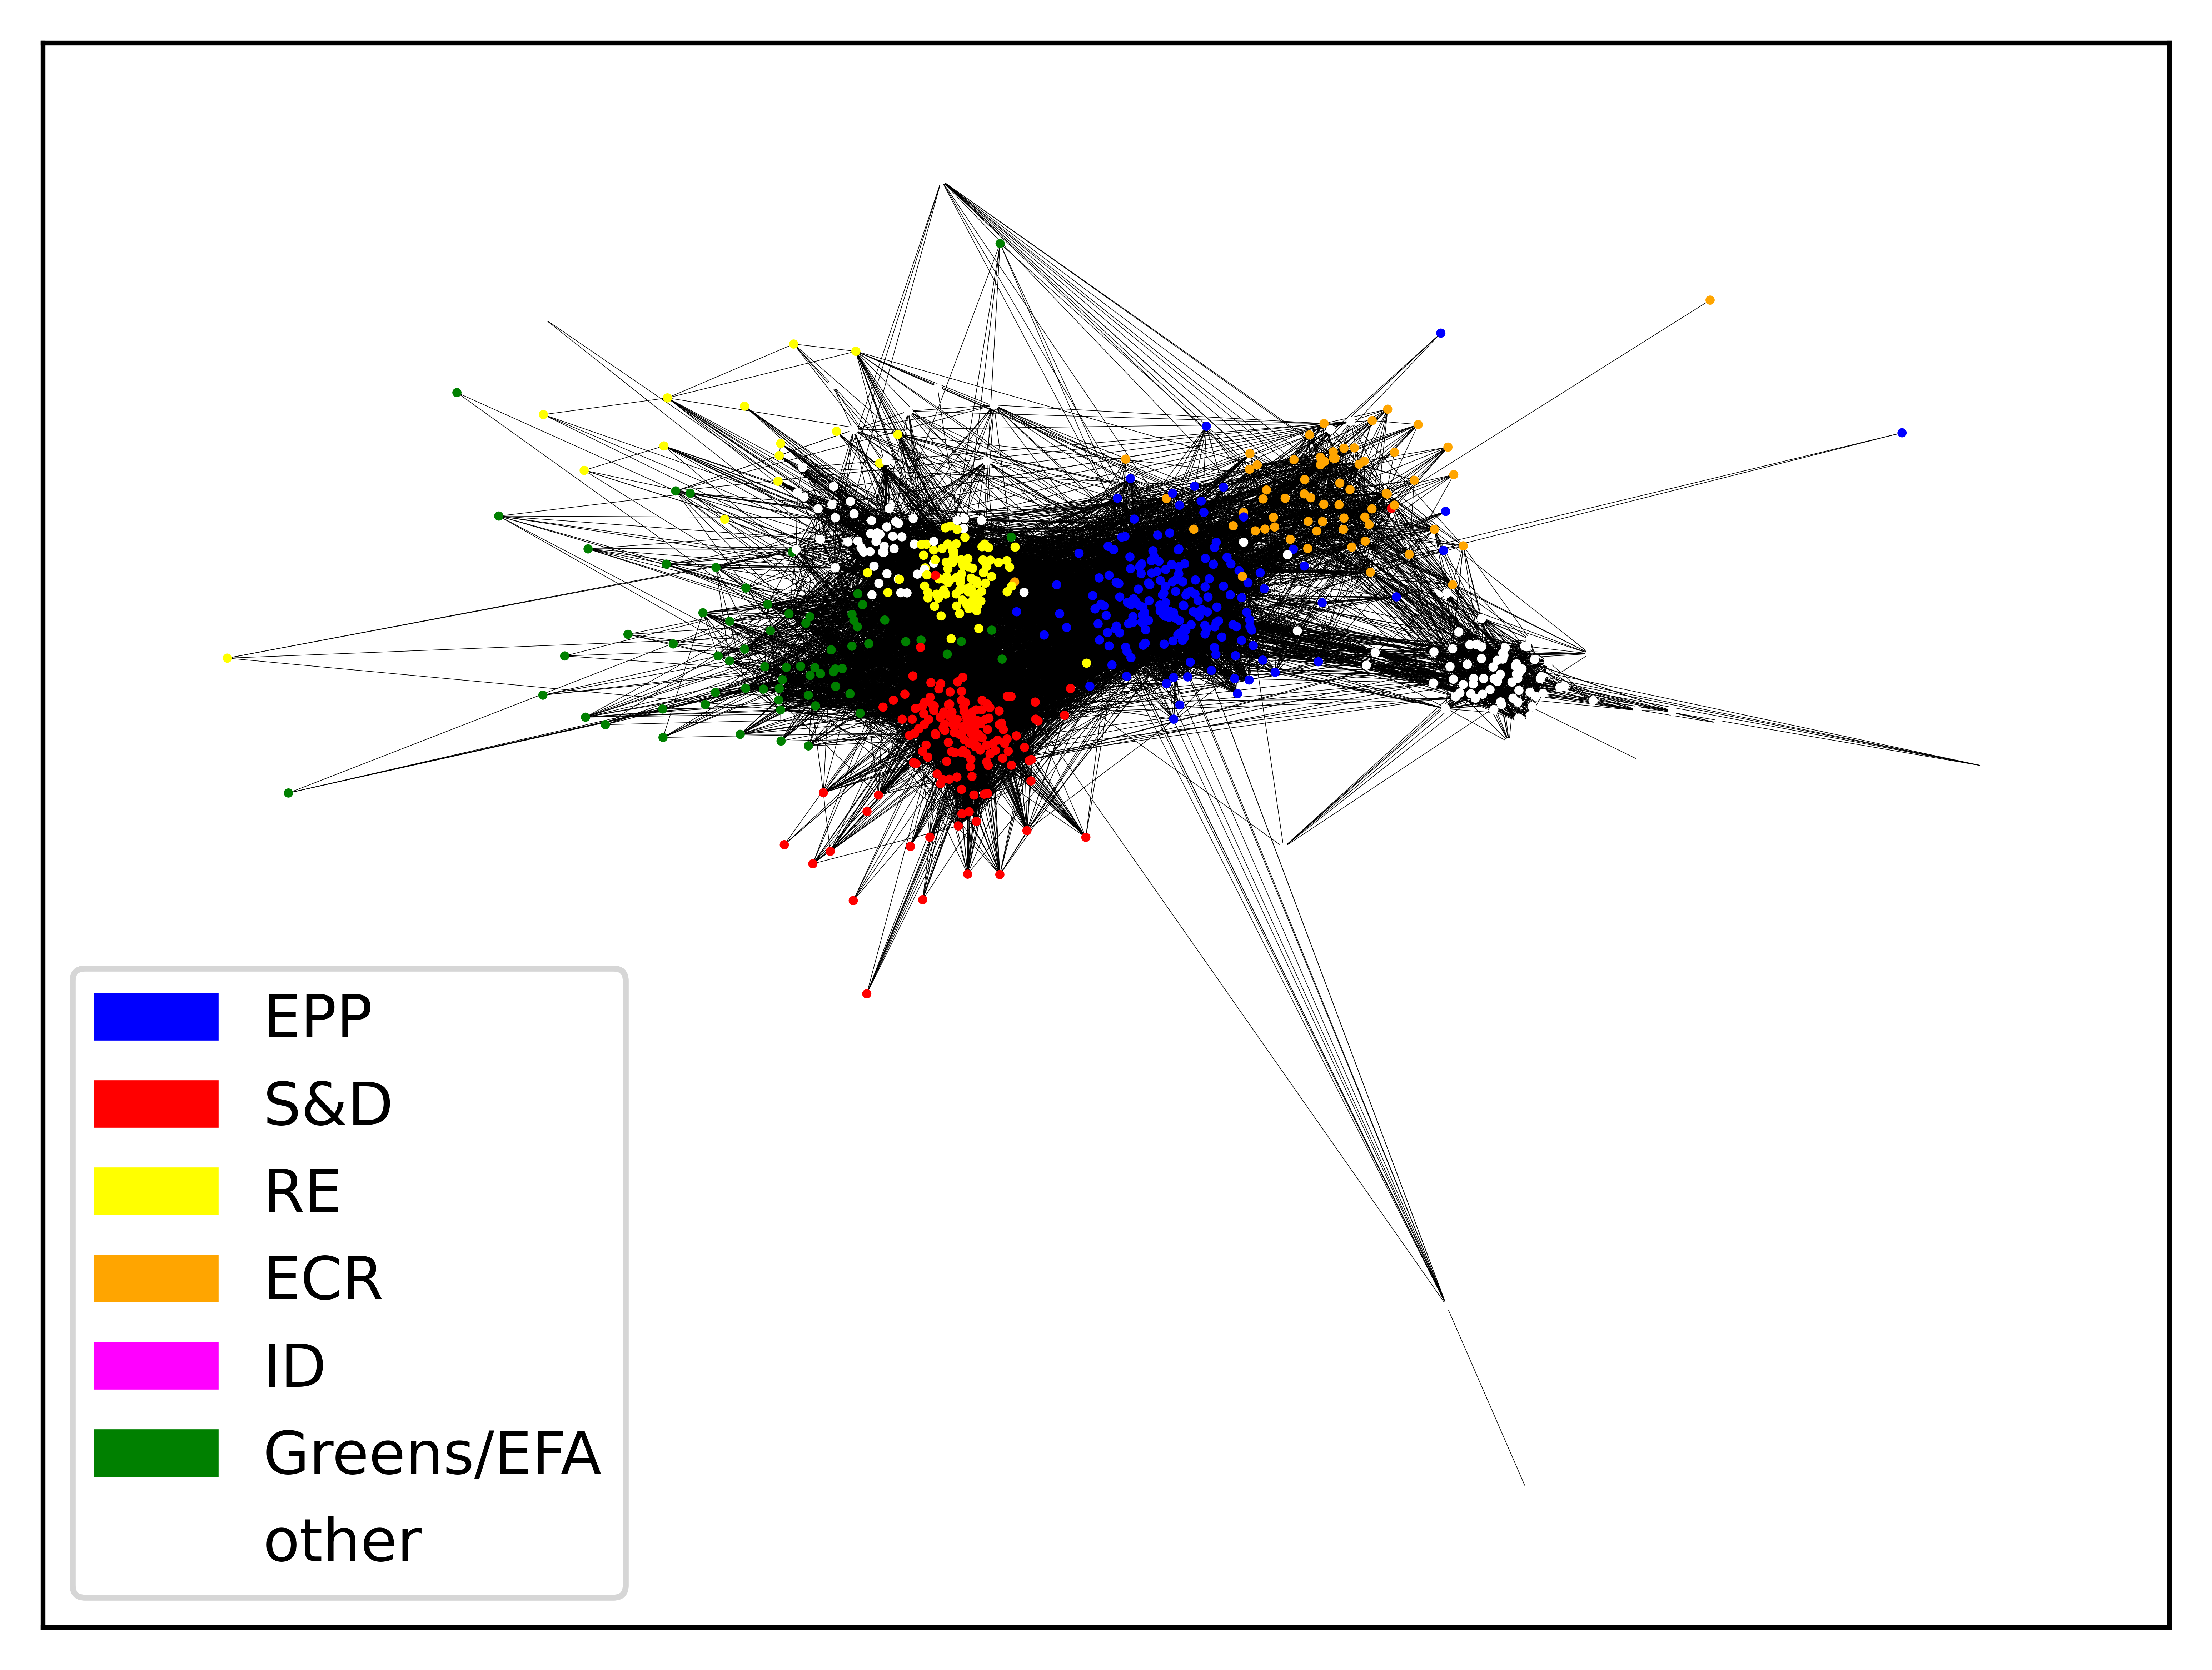

In [9]:
Positions = Updated_Color_EPgroups_in_graph(The_Weighted_Graf, CM)

Adjacency matrix calculation:

In [55]:
#The_Weighted_Graf

def normalize_weights_to_distances(adjacency_matrix):
    # Find the minimum and maximum weights in the matrix
    min_weight = np.min(adjacency_matrix)
    max_weight = np.max(adjacency_matrix)
    
    # Calculate the range of weights
    weight_range = max_weight - min_weight
    print(weight_range)
    # Avoid division by zero by ensuring the range is not zero
    if weight_range == 0:
        weight_range = 1.0
    
    # Apply the normalization formula
    distance_matrix = 1 - (adjacency_matrix - min_weight) / weight_range
    
    #Using a little more complicated normalization
    distance_matrix_exp= np.exp(-0.05*adjacency_matrix)
    return distance_matrix_exp


ADJ_MATRX = nx.to_numpy_matrix(The_Weighted_Graf)

DIST_MTRX = normalize_weights_to_distances(ADJ_MATRX)



932.2666666666704
0.9640415543572858


In [56]:
#Normalization methods comparison
Tester = [0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100, 300]
for i in Tester:
    print(i, end="  ")
    print(1 - ((i - 0) / 932.2666666666704), end="  ")
    print(np.exp(-0.05*i))

0  1.0  1.0
0.01  0.9999892734553776  0.9995001249791693
0.03  0.9999678203661327  0.9985011244377109
0.1  0.9998927345537757  0.9950124791926823
0.3  0.9996782036613272  0.9851119396030626
1  0.9989273455377574  0.951229424500714
3  0.9967820366132724  0.8607079764250578
10  0.9892734553775744  0.6065306597126334
30  0.9678203661327233  0.22313016014842982
100  0.8927345537757442  0.006737946999085467
300  0.6782036613272324  3.059023205018258e-07


In [27]:
def Cluster_dendogram(G):
            
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    Z = linkage(np.reshape(edge_weights, (len(edge_weights), 1)), method='average') #np.reshape(edge_weights, (len(edge_weights), 1))
    
    plt.figure(figsize=(10, 5))
    dendrogram(Z)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Graph Nodes')
    plt.ylabel('Distance')
    plt.show()
    
    return Z

def Cluster_from_dendogram(Graf):

    MTRX = nx.adjacency_matrix(Graf)
    print(MTRX)
    
    return MTRX

In [16]:
Den = Cluster_dendogram(The_Weighted_Graf)

KeyboardInterrupt: 

In [28]:
CLST = Cluster_from_dendogram(The_Weighted_Graf)

  (0, 4)	0.6609890109890109
  (0, 8)	0.8926739926739926
  (0, 14)	1.3465903377668087
  (0, 19)	11.666666666666666
  (0, 58)	1.9721972471972469
  (0, 60)	5.1032753194517895
  (0, 71)	5.5
  (0, 97)	0.7324175824175824
  (0, 117)	0.8926739926739926
  (0, 125)	0.16666666666666666
  (0, 126)	1.1408480408480408
  (0, 127)	0.16666666666666666
  (0, 131)	7.5
  (0, 136)	0.8093406593406592
  (0, 177)	0.7914066325831032
  (0, 187)	0.4357142857142856
  (0, 190)	0.8926739926739926
  (0, 207)	0.16666666666666666
  (0, 248)	0.8926739926739926
  (0, 259)	5.287576312576314
  (0, 290)	0.8926739926739926
  (0, 296)	5.244545160721632
  (0, 297)	2.280891330891331
  (0, 306)	7.966803457979928
  (0, 309)	6.644087285263754
  :	:
  (739, 533)	58.431216006216225
  (739, 618)	27.455458430458393
  (739, 642)	64.50000000000011
  (739, 690)	0.8452380952380951
  (740, 9)	12.771428571428563
  (740, 44)	13.138095238095227
  (740, 62)	14.471428571428556
  (740, 63)	8.971428571428577
  (740, 66)	2.999999999999999
  (740,

C:\Users\berna\AppData\Local\Temp\ipykernel_17152\148164571.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  MTRX = nx.adjacency_matrix(Graf)


In [78]:
cluster_assignment = {}
for node, cluster_id in zip(The_Weighted_Graf.nodes(), CLST):
    cluster_assignment[node] = cluster_id

color_map = [cluster_assignment[node] for node in The_Weighted_Graf.nodes()]
print(set(color_map))

# Draw the graph with nodes colored based on clusters
nx.draw(The_Weighted_Graf, pos=Positions, node_color=color_map, with_labels=False)

# Show the graph
plt.show()

{1}


TypeError: '_AxesStack' object is not callable

<Figure size 7680x5760 with 0 Axes>

## ...

In [ ]:
def listMEPs_div(GDataset): # listing the different MEP names for the given dataset
    o = pd.unique(GDataset['MEPName'])
    return o
       
#defining 2 function for the projection creation
def CreateNXGraph(Graph):
    # we use MEPName instead of OfficialMEPID
    G = nx.from_pandas_edgelist(Graph, source='AmendmentID', target='MEPName')
    return G

## ez miért createBIPARTITE?? pont hogy a bipartiteBÓL csinál egy nem bipartite-ot
def ConnectFromBipartite(myGraph, Gtype, MEP_lista):
    #Gtype = which type of projection we use 
    if Gtype == "classic":
        G = nx.algorithms.bipartite.projected_graph(myGraph, MEP_lista)
    elif Gtype == "collab_weight":
        G = nx.algorithms.bipartite.collaboration_weighted_projected_graph(myGraph, MEP_lista)
    return G 

In [ ]:
ListsMEP = [set(listMEPs_div(miniGraph)) for miniGraph in split_data]#list for each subgraph
#print(ListsMEP)
meps_who_did_something_in_all_intervals = set.intersection(*ListsMEP)
print(meps_who_did_something_in_all_intervals)
print(len(meps_who_did_something_in_all_intervals))